🏛️ Token-Based Tendering System Simulation
Prototype for South African Government Procurement Reform

📊 Sample Data Loaded
Tenders: 5
Contractors: 5

Sample Tender:
Project: Johannesburg Civic Centre
Value: R100,000,000
Location: Johannesburg
Scope: Construction Materials;Professional Services;Equipment;Labour

🔧 Token Engine Initialized

🏗️ SIMULATION: Johannesburg Civic Centre Project
Contractor: Ubuntu Construction Ltd
Project Value: R100,000,000

Project Scope: ['Construction Materials', 'Professional Services', 'Equipment', 'Labour']
Milestones: ['Foundation Work', 'Structural Work', 'Interior Finishing', 'Final Inspection']

💰 Step 1: Issuing Tokens
✅ Tokens issued: R100,000,000
Token ID: 93991424...

🔨 Step 2: Project Execution - Spending Tokens

🏗️ Working on: Foundation Work
   💸 Spent R15,000,000 on Construction Materials
   💸 Spent R8,000,000 on Professional Services
   💸 Spent R5,000,000 on Equipment
   💸 Spent R7,000,000 on Labour
   ✅ Milestone completed with 85% quality 

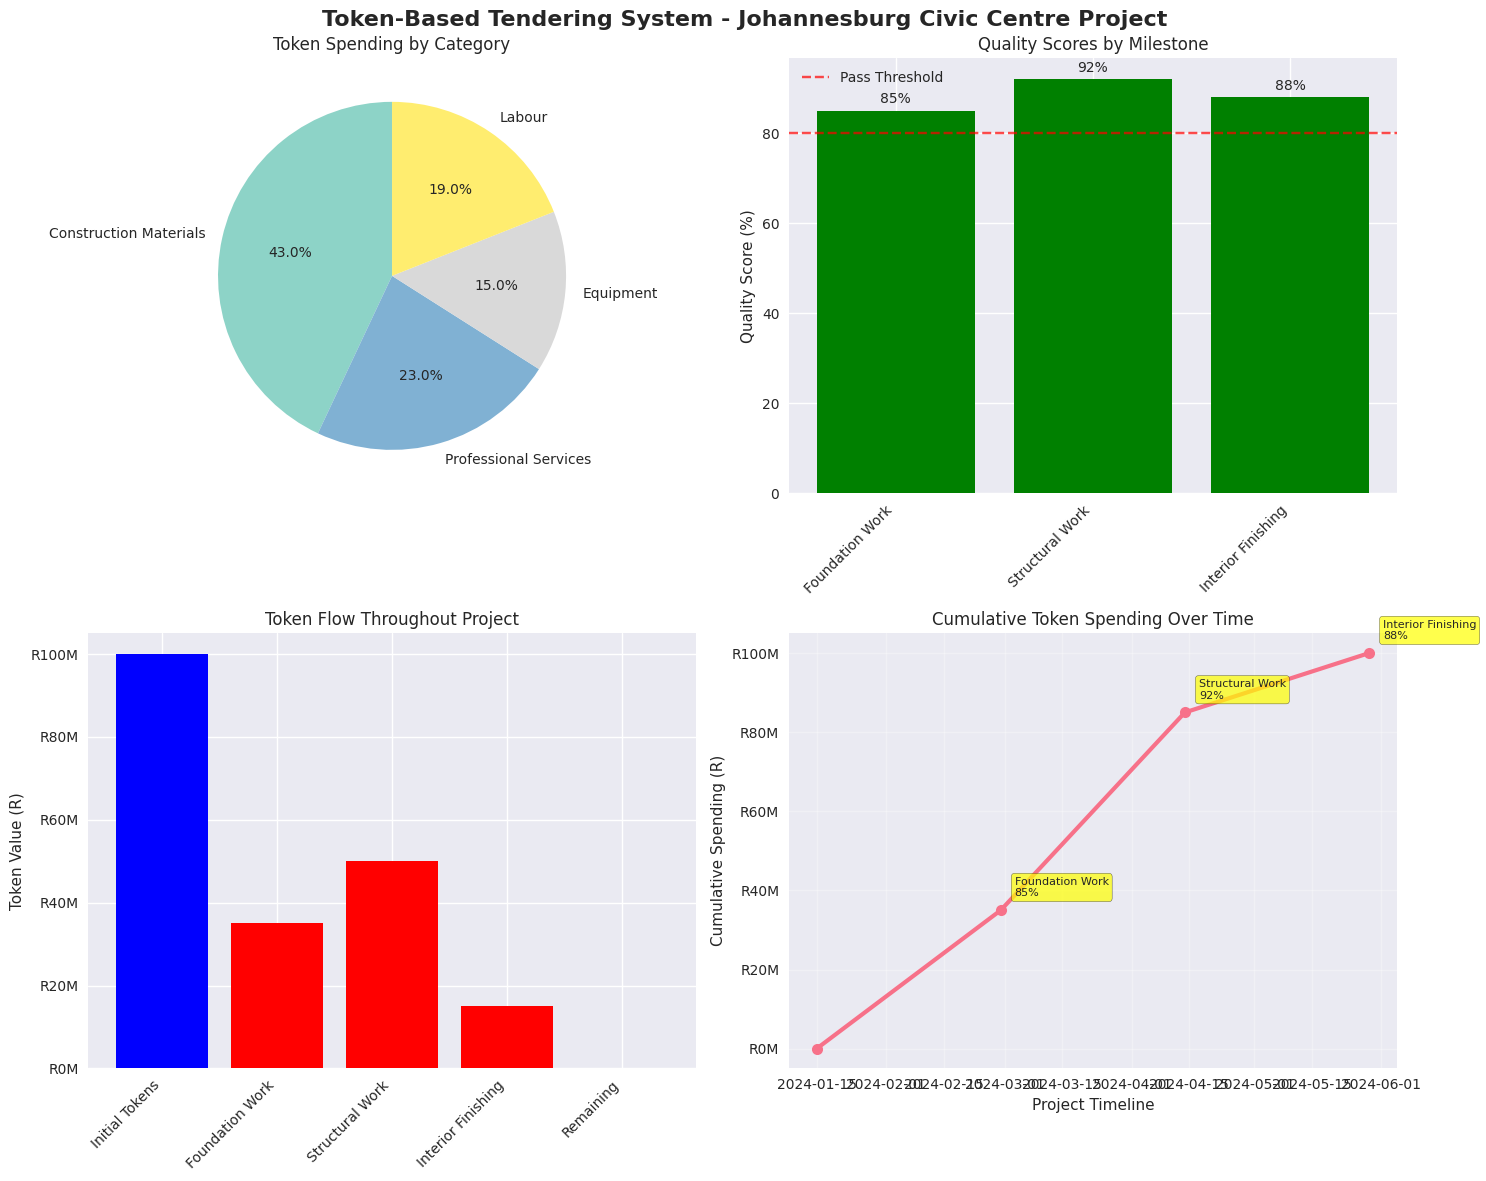

🎯 System Benefits Analysis
✅ Transparency: All token transactions are logged and auditable
✅ Accountability: Tokens can only be spent on approved categories
✅ Quality Incentives: Poor quality results in forfeited tokens
✅ Efficiency Rewards: Contractors get bonuses for efficient delivery
✅ Fraud Prevention: Tokens cannot be cashed out without quality verification
✅ Real-time Monitoring: Government can track spending in real-time
✅ Performance Metrics: Quality scores drive redemption eligibility

📋 Traditional vs Token-Based Comparison:

           Aspect          Traditional System                     Token System
Payment Structure  Milestone payments in cash   Tokens for specific categories
  Quality Control  Post-completion inspection  Continuous quality verification
       Fraud Risk High - cash can be diverted Low - tokens tied to performance
     Transparency          Limited visibility      Full transaction visibility
   Accountability    Difficult to track funds    Complete spen

In [4]:
# Token-Based Tendering System Simulation
# A prototype for addressing corruption in South African government procurement

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
import sys
import os

# Add utils directory to path to import our token engine
sys.path.append('../utils')
from token_engine import TokenEngine

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🏛️ Token-Based Tendering System Simulation")
print("=" * 50)
print("Prototype for South African Government Procurement Reform")
print()

## 1. Load Sample Data

# Load tenders and contractors
tenders_df = pd.read_csv('../data/tenders.csv')
contractors_df = pd.read_csv('../data/contractors.csv')

print("📊 Sample Data Loaded")
print(f"Tenders: {len(tenders_df)}")
print(f"Contractors: {len(contractors_df)}")
print()

# Display sample tender
print("Sample Tender:")
sample_tender = tenders_df.iloc[0]
print(f"Project: {sample_tender['project_name']}")
print(f"Value: R{sample_tender['total_value']:,}")
print(f"Location: {sample_tender['location']}")
print(f"Scope: {sample_tender['project_scope']}")
print()

## 2. Initialize Token Engine

# Initialize the token engine
engine = TokenEngine('../data/transactions.json')
print("🔧 Token Engine Initialized")
print()

## 3. Simulation: Johannesburg Civic Centre Project

# Select the first tender for our simulation
tender = tenders_df.iloc[0]
contractor = contractors_df.iloc[0]

print("🏗️ SIMULATION: Johannesburg Civic Centre Project")
print(f"Contractor: {contractor['company_name']}")
print(f"Project Value: R{tender['total_value']:,}")
print()

# Parse project scope and milestones
project_scope = tender['project_scope'].split(';')
milestones = tender['milestones'].split(';')

print(f"Project Scope: {project_scope}")
print(f"Milestones: {milestones}")
print()

## 4. Issue Tokens

print("💰 Step 1: Issuing Tokens")
issuance = engine.issue_tokens(
    tender_id=tender['tender_id'],
    contractor_id=contractor['contractor_id'],
    total_value=tender['total_value'],
    project_scope=project_scope
)

print(f"✅ Tokens issued: R{issuance['tokens_issued']:,}")
print(f"Token ID: {issuance['transaction_id'][:8]}...")
print()

## 5. Simulate Project Execution

print("🔨 Step 2: Project Execution - Spending Tokens")
print()

# Define spending plan for each milestone
spending_plan = [
    # Foundation Work
    {
        'milestone': 'Foundation Work',
        'spendings': [
            {'amount': 15000000, 'category': 'Construction Materials', 'description': 'Concrete, steel reinforcement, foundation materials'},
            {'amount': 8000000, 'category': 'Professional Services', 'description': 'Engineering consultancy, site supervision'},
            {'amount': 5000000, 'category': 'Equipment', 'description': 'Excavation equipment rental'},
            {'amount': 7000000, 'category': 'Labour', 'description': 'Foundation construction team'}
        ],
        'quality_score': 85
    },
    # Structural Work
    {
        'milestone': 'Structural Work',
        'spendings': [
            {'amount': 20000000, 'category': 'Construction Materials', 'description': 'Steel beams, concrete, building materials'},
            {'amount': 10000000, 'category': 'Professional Services', 'description': 'Structural engineering, project management'},
            {'amount': 8000000, 'category': 'Equipment', 'description': 'Cranes, construction equipment'},
            {'amount': 12000000, 'category': 'Labour', 'description': 'Skilled construction workers'}
        ],
        'quality_score': 92
    },
    # Interior Finishing
    {
        'milestone': 'Interior Finishing',
        'spendings': [
            {'amount': 8000000, 'category': 'Construction Materials', 'description': 'Interior finishes, fixtures, fittings'},
            {'amount': 5000000, 'category': 'Professional Services', 'description': 'Interior design, electrical, plumbing'},
            {'amount': 2000000, 'category': 'Equipment', 'description': 'Specialized finishing equipment'},
            {'amount': 3000000, 'category': 'Labour', 'description': 'Finishing specialists'}
        ],
        'quality_score': 88
    }
]

# Execute the spending plan
total_spent = 0
milestone_results = []

for phase in spending_plan:
    milestone_name = phase['milestone']
    print(f"🏗️ Working on: {milestone_name}")
    
    phase_total = 0
    for spending in phase['spendings']:
        try:
            transaction = engine.spend_tokens(
                tender_id=tender['tender_id'],
                contractor_id=contractor['contractor_id'],
                amount=spending['amount'],
                category=spending['category'],
                milestone=milestone_name,
                description=spending['description']
            )
            phase_total += spending['amount']
            print(f"   💸 Spent R{spending['amount']:,} on {spending['category']}")
        except Exception as e:
            print(f"   ❌ Error: {e}")
    
    total_spent += phase_total
    
    # Verify milestone
    verification = engine.verify_milestone(
        tender_id=tender['tender_id'],
        milestone=milestone_name,
        quality_score=phase['quality_score']
    )
    
    milestone_results.append({
        'milestone': milestone_name,
        'spent': phase_total,
        'quality_score': phase['quality_score'],
        'passed': verification['passed']
    })
    
    print(f"   ✅ Milestone completed with {phase['quality_score']}% quality score")
    print(f"   💰 Phase total: R{phase_total:,}")
    print()

print(f"📊 Project Execution Summary:")
print(f"Total spent: R{total_spent:,}")
print(f"Remaining tokens: R{tender['total_value'] - total_spent:,}")
print()

## 6. Final Redemption

print("🏁 Step 3: Final Token Redemption")

# Check if we can redeem tokens
try:
    redemption = engine.redeem_tokens(
        tender_id=tender['tender_id'],
        contractor_id=contractor['contractor_id']
    )
    
    print(f"🎉 Tokens successfully redeemed!")
    print(f"Tokens redeemed: R{redemption['tokens_redeemed']:,}")
    print(f"Cash value: R{redemption['cash_value']:,}")
    print(f"Bonus multiplier: {redemption['bonus_multiplier']:.2f}")
    print(f"Average quality score: {redemption['average_quality_score']:.1f}%")
    
except Exception as e:
    print(f"❌ Redemption failed: {e}")

print()

## 7. Analysis and Visualization

print("📈 Analysis and Visualizations")
print()

# Get project summary
summary = engine.get_tender_summary(tender['tender_id'])
spending_by_category = engine.get_spending_by_category(tender['tender_id'])

print("Project Summary:")
print(f"- Total tokens issued: R{summary['total_tokens_issued']:,}")
print(f"- Total tokens spent: R{summary['total_tokens_spent']:,}")
print(f"- Tokens remaining: R{summary['tokens_remaining']:,}")
print(f"- Final status: {summary['final_outcome']}")
print(f"- Average quality score: {summary['average_quality_score']:.1f}%")
print()

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Token-Based Tendering System - Johannesburg Civic Centre Project', fontsize=16, fontweight='bold')

# 1. Spending by Category (Pie Chart)
categories = list(spending_by_category.keys())
amounts = list(spending_by_category.values())
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

ax1.pie(amounts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Token Spending by Category')

# 2. Milestone Quality Scores (Bar Chart)
milestones_names = [m['milestone'] for m in milestone_results]
quality_scores = [m['quality_score'] for m in milestone_results]
colors_bar = ['green' if score >= 80 else 'orange' for score in quality_scores]

bars = ax2.bar(range(len(milestones_names)), quality_scores, color=colors_bar)
ax2.set_title('Quality Scores by Milestone')
ax2.set_ylabel('Quality Score (%)')
ax2.set_xticks(range(len(milestones_names)))
ax2.set_xticklabels(milestones_names, rotation=45, ha='right')
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Pass Threshold')
ax2.legend()

# Add value labels on bars
for bar, score in zip(bars, quality_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{score}%', ha='center', va='bottom')

# 3. Token Flow (Waterfall-style)
token_flow_labels = ['Initial Tokens', 'Foundation Work', 'Structural Work', 'Interior Finishing', 'Remaining']
token_flow_values = [
    tender['total_value'],
    -sum(s['spent'] for s in milestone_results if s['milestone'] == 'Foundation Work'),
    -sum(s['spent'] for s in milestone_results if s['milestone'] == 'Structural Work'),
    -sum(s['spent'] for s in milestone_results if s['milestone'] == 'Interior Finishing'),
    summary['tokens_remaining']
]

# Create cumulative values for waterfall effect
cumulative = [token_flow_values[0]]
for i in range(1, len(token_flow_values)-1):
    cumulative.append(cumulative[-1] + token_flow_values[i])
cumulative.append(token_flow_values[-1])

ax3.bar(range(len(token_flow_labels)), 
        [abs(v) for v in token_flow_values], 
        color=['blue', 'red', 'red', 'red', 'green'])
ax3.set_title('Token Flow Throughout Project')
ax3.set_ylabel('Token Value (R)')
ax3.set_xticks(range(len(token_flow_labels)))
ax3.set_xticklabels(token_flow_labels, rotation=45, ha='right')

# Format y-axis to show values in millions
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R{x/1e6:.0f}M'))

# 4. Project Timeline Simulation
dates = pd.date_range(start='2024-01-15', periods=len(milestone_results)+1, freq='45D')
cumulative_spending = [0]
for milestone in milestone_results:
    cumulative_spending.append(cumulative_spending[-1] + milestone['spent'])

ax4.plot(dates, cumulative_spending, marker='o', linewidth=3, markersize=8)
ax4.set_title('Cumulative Token Spending Over Time')
ax4.set_ylabel('Cumulative Spending (R)')
ax4.set_xlabel('Project Timeline')
ax4.grid(True, alpha=0.3)

# Format y-axis
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R{x/1e6:.0f}M'))

# Annotate milestones
for i, (date, spending, milestone) in enumerate(zip(dates[1:], cumulative_spending[1:], milestone_results)):
    ax4.annotate(f"{milestone['milestone']}\n{milestone['quality_score']}%", 
                xy=(date, spending), 
                xytext=(10, 10), 
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=8)

plt.tight_layout()
plt.show()

## 8. System Benefits Analysis

print("🎯 System Benefits Analysis")
print("=" * 40)

benefits = [
    "✅ Transparency: All token transactions are logged and auditable",
    "✅ Accountability: Tokens can only be spent on approved categories",
    "✅ Quality Incentives: Poor quality results in forfeited tokens",
    "✅ Efficiency Rewards: Contractors get bonuses for efficient delivery",
    "✅ Fraud Prevention: Tokens cannot be cashed out without quality verification",
    "✅ Real-time Monitoring: Government can track spending in real-time",
    "✅ Performance Metrics: Quality scores drive redemption eligibility"
]

for benefit in benefits:
    print(benefit)

print()
print("📋 Traditional vs Token-Based Comparison:")
print()

comparison_data = {
    'Aspect': ['Payment Structure', 'Quality Control', 'Fraud Risk', 'Transparency', 'Accountability'],
    'Traditional System': [
        'Milestone payments in cash',
        'Post-completion inspection',
        'High - cash can be diverted',
        'Limited visibility',
        'Difficult to track funds'
    ],
    'Token System': [
        'Tokens for specific categories',
        'Continuous quality verification',
        'Low - tokens tied to performance',
        'Full transaction visibility',
        'Complete spending audit trail'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print()
print("🚀 Next Steps for Implementation:")
print("1. Pilot program with selected municipalities")
print("2. Integration with existing procurement systems")
print("3. Training for procurement officials and contractors")
print("4. Legal framework development")
print("5. Technology infrastructure setup")
print()

print("📊 Simulation Complete!")
print(f"Project demonstrated successful token-based procurement management")
print(f"with {len(milestone_results)} milestones and R{summary['tokens_remaining']:,} in efficiency savings.")